In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os, sys

project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)
from mansoor import Repeatable

### Create Instance for repeatable

In [2]:
r = Repeatable(base_path='../../data/images/')

## Read and Display Images

### Read and Display Single Image

In [3]:
img = r.load_image() # Read image

In [4]:
cv2.imshow('Bin Salman', img) # Show image
cv2.waitKey(2000) # Wait for 2 second, we pass 0 to wait till keyPress
cv2.destroyWindow('Bin Salman')

### Display Images in Multiple Windows

In [5]:
cv2.imshow('Bin Salman', img) # Show images
cv2.imshow('Bin Salman2', img) # Show 2nd image
cv2.waitKey(0) # Wait untill key Press
# cv2.destroyWindow('Bin Salman') # It only destroy first window on keypress
cv2.destroyAllWindows()

## Show Multiple Images

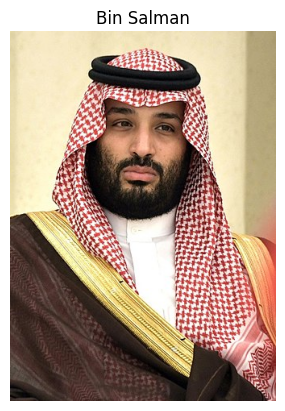

In [6]:
r.show_image_with_color(img, 'Bin Salman')

### Resize Image

In [7]:
img.shape # Check the height, width and channel of an image

(459, 330, 3)

In [8]:
r_img = cv2.resize(img, (100, 200)) # Resize image and give it new height and width

In [9]:
r_img.shape

(200, 100, 3)

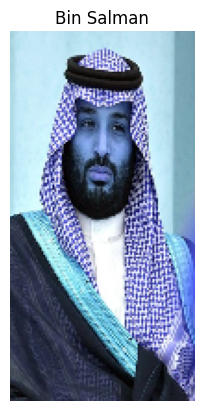

In [10]:
r.showImage(r_img, 'Bin Salman')

### hstack to combine images

In [11]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.hstack((a,b))
c

array([1, 2, 3, 4, 5, 6])

#### Load 2 images and show in frame

In [12]:
binSalman = r.load_image()
cyber = r.load_image('2.jpeg')

In [13]:
def shape_of_images(*args):
    '''Checks and prints the shapes of multiple images.

    Args:
        *args: A variable number of image arrays (ndarrays). Each image should be a NumPy array, 
               typically in the format (height, width, channels) for color images or 
               (height, width) for grayscale images.

    Prints the shape of each image passed as an argument, which can help determine 
    if the images are compatible for joining or concatenation (i.e., having the same height or width).

    Example:
        shape_of_images(image1, image2, image3)
        This will print the shapes of image1, image2, and image3.
    '''
    for idx, img in enumerate(args, start=1):
        print(f'Image {idx} shape: {img.shape}')


In [14]:
r.shape_of_images(binSalman, cyber)

Image 1 shape: (459, 330, 3)
Image 2 shape: (1024, 1024, 3)


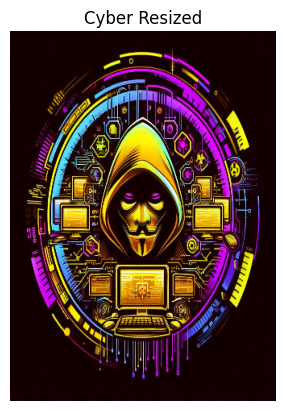

In [15]:
# Resize cyber image
cyber = cv2.resize(cyber, (330, 459))
r.showImage(cyber, 'Cyber Resized')

In [16]:
r.shape_of_images(binSalman, cyber)

Image 1 shape: (459, 330, 3)
Image 2 shape: (459, 330, 3)


#### Now join these two images using hstack

In [17]:
img = np.hstack((binSalman, cyber))

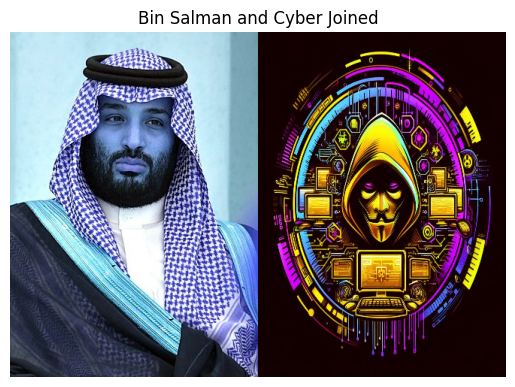

In [18]:
r.showImage(img, 'Bin Salman and Cyber Joined')

### vstack to combine images

In [19]:
a = np.array([1,2,3])
b = np.array([3,4,5])
c = np.vstack((a,b))
c

array([[1, 2, 3],
       [3, 4, 5]])

In [20]:
v_img = np.vstack((binSalman,cyber))

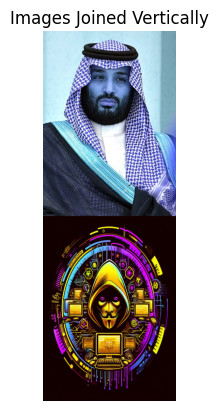

In [21]:
r.showImage(v_img, 'Images Joined Vertically')

#### Now Combine Three Images

In [22]:
flag = r.load_image('flag.jpg')

In [23]:
# We check shape of image of horizantally joined images and flag
r.shape_of_images(img, flag)

Image 1 shape: (459, 660, 3)
Image 2 shape: (240, 480, 3)


In [24]:
# Resize flag image
flag = cv2.resize(flag, (660, 459))

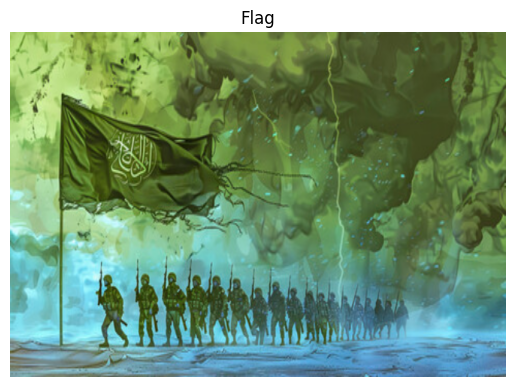

In [25]:
r.showImage(flag, 'Flag')

#### Join these images vertically through Vstack

In [26]:
img = np.vstack((img,flag))

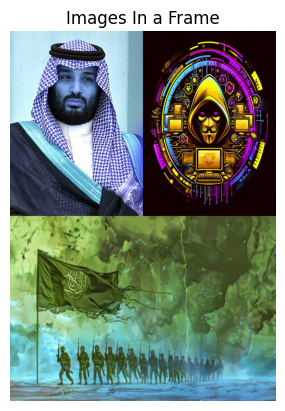

In [27]:
r.showImage(img, "Images In a Frame")

### Join and Display images horizontally and vartically

In [28]:
img1 = r.load_image('img1.jpeg')
img2 = r.load_image('img2.jpg')
img3 = r.load_image('img3.jpg')
img4 = r.load_image('img4.jpg')

In [29]:
# Now resize all 4 images
r_img1 = cv2.resize(img1,(300,300))
r_img2 = cv2.resize(img2,(300,300))
r_img3 = cv2.resize(img3,(300,300))
r_img4 = cv2.resize(img4,(300,300))

# Concatinate 2 images horizontally
h_images1 = np.hstack((r_img1,r_img2))
h_images2 = np.hstack((r_img3,r_img4))

# Concatenate these images vartically
v_images = np.vstack((h_images1,h_images2))

# Display in frame
cv2.imshow("Images",v_images)

# Wait till any key press
cv2.waitKey(0)

# Destroy image window 
cv2.destroyWindow("Images")

## Slide Show

### Get files name

In [30]:
file_names = os.listdir(r.base_path)

In [31]:
print(file_names)

['1.jpg', '1bit1.png', '2.jpeg', '2bit2.png', 'bin_Salman.jpg', 'circles.jpg', 'colonies-01.jpg', 'colonies-02.jpg', 'colonies-03.jpg', 'D3voB.png', 'e97xP.png', 'flag.jpg', 'image.png', 'img1.jpeg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg', 'img6.jpg', 'IMG_7582-768x1024.jpg', 'ladybugs.png', 'linesDetected.png', 'OIP (1).jpg', 'OIP.jpg', 'Picture1.jpg', 'plant-seedling.jpg', 'saltandpepperlena.jpg', 'shapes-01.jpg', 'ts_os.png', 'wellplate-02.jpg']


In [32]:
# If you want to display all images:
for name in file_names:
    name_path = r.base_path + name  # Full path to the image
    image = cv2.imread(name_path)  # Read the image
    # print(name_path)
    image_resized = cv2.resize(image, (300, 300))  # Resize the image
    cv2.imshow("Images", image_resized)  # Use the filename as the window name
    cv2.waitKey(1000)  # Wait for 1000 ms (1 seconds)

cv2.destroyAllWindows()

## Save Images

#### `cv2.imwrite()`

In [33]:
os.makedirs('output', exist_ok=True)

In [35]:
cv2.imwrite(filename='output/merged.png', img=v_images)

True